### Import libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

### Define variables

In [6]:
#UPDATE
data_folder = "/scratch/projects/hockygroup/ss12902/ShapeGMM_tutorial/run_metad/"

folders = [os.path.join(data_folder,fn) for fn in [ "height_0.5_bf8_sigma_0.4", "height_0.9_bf8_sigma_0.4", "height_1.3_bf8_sigma_0.4", "height_1.7_bf8_sigma_0.4"]]
sim_time = 100001 # 100 ns 
num_vars = 4  # ld1, phi, pdi and meta.rbias
num_fes_files = 10  # deposited every 10ns 
num_grids = 91
kt = 0.596161  # @T=300K
time  = np.arange(sim_time)*1e-3 # in ns

### load COLVAR data from different simulations

In [7]:
colvar_data = np.empty([len(folders), num_vars, sim_time])

for i in range(len(folders)):
    colvar_data[i,:,:] = np.loadtxt(folders[i]+"/COLVAR", usecols=(1,2,3,5)).T

### load FESs obtained from sum_hills

In [10]:
fes_data = np.empty([len(folders), num_fes_files, 2, num_grids])

for i in range(len(folders)):
    for j in range(num_fes_files):
        fes_data[i, j, :, :] = np.loadtxt(folders[i]+"/fes_ld1_%d.dat"%j, usecols=(0,1)).T

### load data from phi-psi wt-metad simulation 

In [13]:
ld1, phi_, psi_, meta_rbias = np.loadtxt(os.path.join(data_folder,'bias_phi_psi/COLVAR'), usecols=(1,2,3,5), unpack=True)


$\textbf{calculate ld1 from phi-psi metad sim}$

/state/partition1/job-64920409/ipykernel_295114/1364122416.py:3: RuntimeWarning: divide by zero encountered in log
  f = -kt*np.log(h)


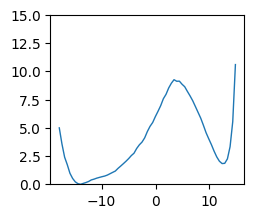

In [14]:
h, g = np.histogram(ld1, bins=91, range=[-25,20], weights=np.exp(meta_rbias/kt))
b = (g[1:]+g[:-1])/2
f = -kt*np.log(h)
f -= f.min()

plt.figure(figsize=(2.5,2.2))
plt.ylim(0,15)
plt.plot(b, f, lw=1)

$\textbf{calculate 2d FES from phi-psi metad sim}$

/state/partition1/job-64920409/ipykernel_295114/878986366.py:5: RuntimeWarning: divide by zero encountered in log
  fe_ref = -kt*np.log(hist)


Text(0, 0.5, '$\\psi$')

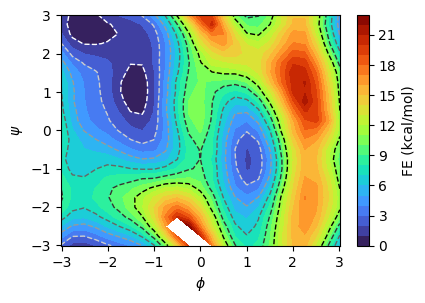

In [15]:
hist, xedges, yedges = np.histogram2d(phi_, psi_, bins=[25,25], density=True, weights=np.exp(meta_rbias/kt))
xcenters = (xedges[1:]+xedges[:-1])/2
ycenters = (yedges[1:]+yedges[:-1])/2
xx, yy = np.meshgrid(xcenters, ycenters)
fe_ref = -kt*np.log(hist)
fe_ref -= fe_ref.min()

fig, ax = plt.subplots(1, 1, figsize=(4.5,3))
im = ax.contourf(xx, yy, fe_ref.T, cmap='turbo', levels=25)
ax.set_xticks(np.arange(-3,4))
ax.set_yticks(np.arange(-3,4))
ax.contour(xx, yy, fe_ref.T, cmap="binary", levels=np.arange(1,12,2), linestyles="--", linewidths=1.0)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('FE (kcal/mol)')
ax.set_xlabel('$\phi$')
ax.set_ylabel('$\psi$')

### Plot FE vs. LD1 obtained at multiple times

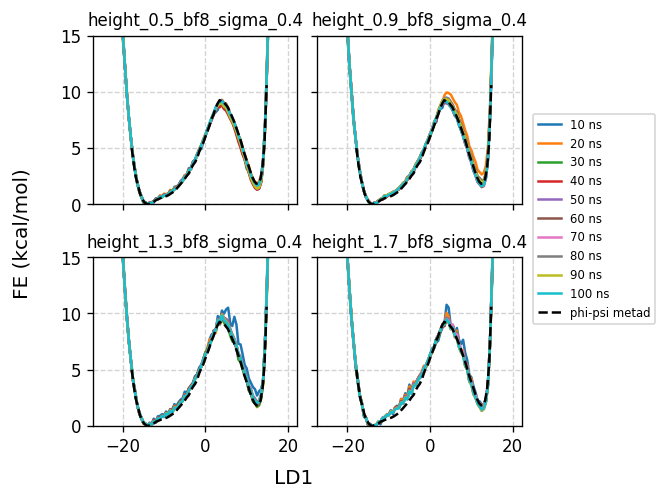

In [19]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(5,4), dpi=120)
axs = axs.reshape([-1])  # Flatten the axes array for easier iteration

# Plot your data and collect handles and labels for the legend
handles = []
labels = []

for i in range(len(folders)):
    axs[i].set_ylim(0,15)
    axs[i].set_title(os.path.basename(folders[i]), fontsize=10)
    axs[i].grid(axis='both', which='major', linestyle='--', color='lightgrey')
    
    for j in range(num_fes_files):
        line, = axs[i].plot(fes_data[i,j,0,:], fes_data[i,j,1,:], label='%d ns'%((j+1)*10))
        # Only add to handles/labels once (since all subplots have same lines)
        if i == 0:  # Only for first subplot
            handles.append(line)
            labels.append('%d ns'%((j+1)*10))
    
    line, = axs[i].plot(b, f, 'k--', lw=1.5, label='phi-psi metad')
    if i==0:
        handles.append(line)
        labels.append('phi-psi metad')

    
# Adjust layout to make space for the legend
fig.tight_layout()
fig.supylabel('FE (kcal/mol)', x=-0.05)
fig.supxlabel('LD1', x=0.42, y =-0.03)

# Add a single legend for the entire figure
fig.legend(handles, labels, loc='lower center', 
           bbox_to_anchor=(0.92, 0.3),  # Adjust these values as needed
           ncol=1, fontsize='x-small')  # Adjust number of columns as needed

# You might need to adjust the figure margins to accommodate the legend
plt.subplots_adjust(right=0.8)  # Increase this value if legend is cut off

### plot 2d FES for different simulations

/state/partition1/job-64920409/ipykernel_295114/283615479.py:12: RuntimeWarning: divide by zero encountered in log
  fe = -kt*np.log(hist)


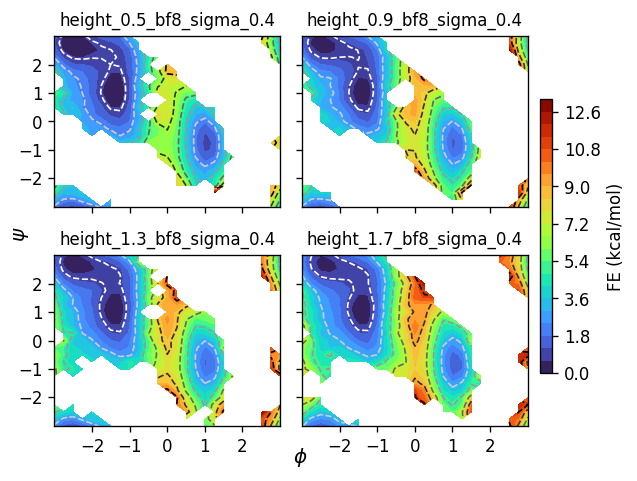

In [20]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(5,4), dpi=120)
axs = axs.reshape([-1])

for i in range(len(folders)):
    phi, psi = colvar_data[i, 1:3, :]
    wgts = np.exp(colvar_data[i,3,:]/kt)
    
    hist, xedges, yedges = np.histogram2d(phi, psi, bins=[25,25], density=True, weights=wgts)
    xcenters = (xedges[1:]+xedges[:-1])/2
    ycenters = (yedges[1:]+yedges[:-1])/2
    xx, yy = np.meshgrid(xcenters, ycenters)
    fe = -kt*np.log(hist)
    fe -= fe.min()
    
    axs[i].set_xticks(np.arange(-2,3))
    axs[i].set_yticks(np.arange(-2,3))
    axs[i].set_title(os.path.basename(folders[i]), fontsize=10)
    im = axs[i].contourf(xx, yy, fe.T, cmap='turbo', levels=25)
    axs[i].contour(xx, yy, fe.T, cmap="binary", levels=np.arange(1,12,2), linestyles="--", linewidths=1.0)
    
fig.tight_layout()    
fig.supxlabel('$\phi$')
fig.supylabel('$\psi$')

# Create a common colorbar
cbar_ax = fig.add_axes([0.90, 0.21, 0.02, 0.57])  # [x, y, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)

# Optionally, add a label to the colorbar
cbar.set_label('FE (kcal/mol)')
#cbar.set_ticks(np.arange(0, 6, 0.5))
#cbar.set_ticklabels(np.arange(0, 6, 0.5))
fig.subplots_adjust(right=0.88)

### scatter plot: comparing 2d fes with reference FE

/state/partition1/job-64920409/ipykernel_295114/3061733570.py:12: RuntimeWarning: divide by zero encountered in log
  fe = -kt*np.log(hist)


Text(-0.05, 0.5, '2d Fes from phi-psi metad (kcal/mol)')

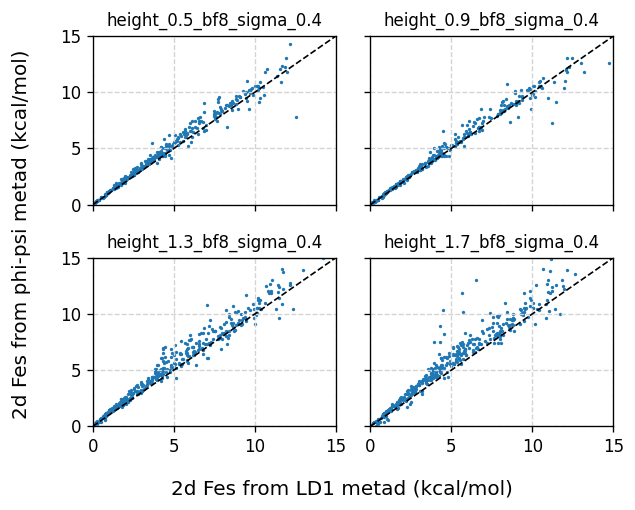

In [21]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(5,4), dpi=120)
axs = axs.reshape([-1])

for i in range(len(folders)):
    phi, psi = colvar_data[i, 1:3, :]
    wgts = np.exp(colvar_data[i,3,:]/kt)
    
    hist, xedges, yedges = np.histogram2d(phi, psi, bins=[25,25], density=True, weights=wgts)
    xcenters = (xedges[1:]+xedges[:-1])/2
    ycenters = (yedges[1:]+yedges[:-1])/2
    xx, yy = np.meshgrid(xcenters, ycenters)
    fe = -kt*np.log(hist)
    fe -= fe.min()
    
    axs[i].set_xlim(0,15)
    axs[i].set_ylim(0,15)
    axs[i].plot(np.arange(16), np.arange(16), lw=1.0, ls='--', color='k')
    axs[i].grid(axis='both', which='major', linestyle='--', color='lightgrey')
    axs[i].set_title(os.path.basename(folders[i]), fontsize=10)
    axs[i].scatter(fe.flatten(), fe_ref.flatten(), marker='o', s=1.0)
    
fig.tight_layout()    
fig.supxlabel('2d Fes from LD1 metad (kcal/mol)', y=-0.05)
fig.supylabel('2d Fes from phi-psi metad (kcal/mol)', x=-0.05)

### plot $\phi$ vs. time

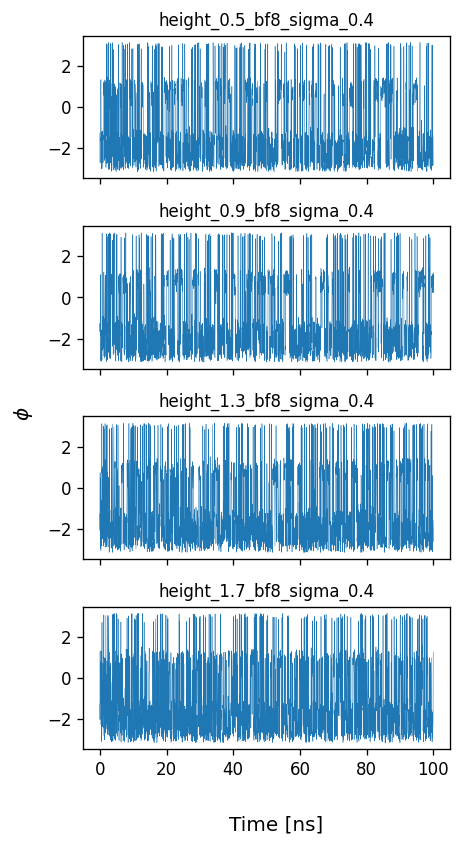

In [22]:
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(4,7), dpi=120)

for i in range(len(folders)):
    axs[i].set_title(os.path.basename(folders[i]), fontsize=10)
    axs[i].plot(time[::40],  colvar_data[i,1,:][::40], lw=0.3)
    
fig.supxlabel('Time [ns]', x=0.6, y=-0.0001)
fig.supylabel('$\phi$', x=0.05)
fig.tight_layout()
#fig.subplots_adjust(right=0.8)

### plot LD1 vs. time

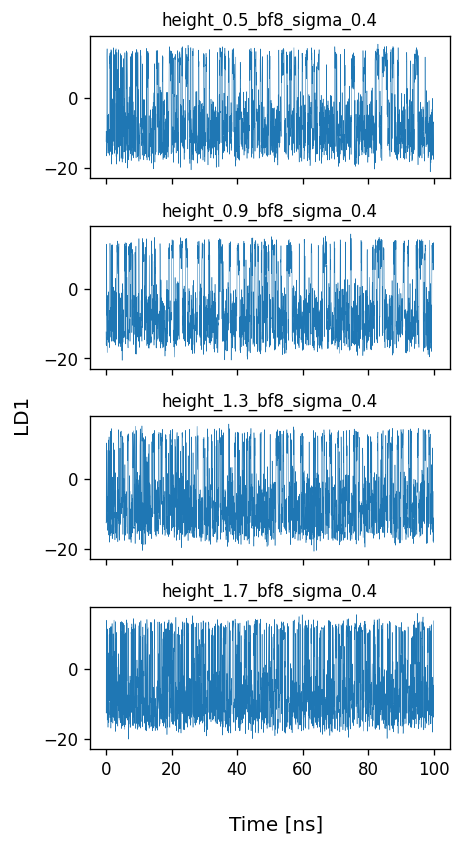

In [23]:
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(4,7), dpi=120)

for i in range(len(folders)):
    axs[i].set_title(os.path.basename(folders[i]), fontsize=10)
    axs[i].plot(time[::40],  colvar_data[i,0,:][::40], lw=0.3)
    
fig.supxlabel('Time [ns]', x=0.6, y=-0.0001)
fig.supylabel('LD1', x=0.05)
fig.tight_layout()
#fig.subplots_adjust(right=0.8)

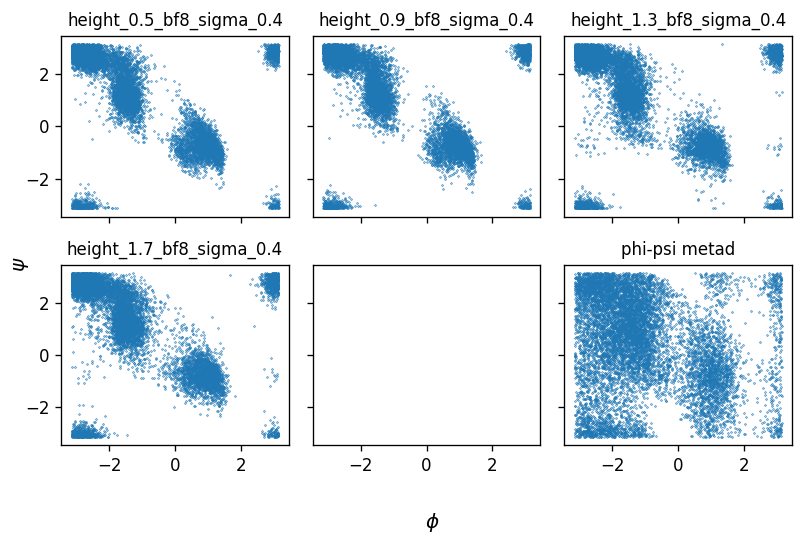

In [34]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(7,4.5), dpi=120)
axs = axs.reshape([-1])

upto_ = 10000
for i in range(len(folders)):
    axs[i].set_title(os.path.basename(folders[i]), fontsize=10)
    axs[i].scatter(colvar_data[i,1,:][:upto_:],  colvar_data[i,2,:][:upto_:], marker='.', s=0.5)
    
axs[5].set_title("phi-psi metad", fontsize=10)
axs[5].scatter(phi_[:upto_:], psi_[:upto_:], marker='.', s=0.5)
    
fig.supxlabel('$\phi$', x=0.55, y=-0.0001)
fig.supylabel('$\psi$', x=0.05)
fig.tight_layout()